### Assignment 1 b

In [1]:
import time
import random
import copy
import matplotlib.pyplot as plt

from assignement1 import SortingAlgos, HeapSortAlgo, QuickSortAlgo



### Util functions

In [2]:
def pseudo_rng_arrays(size, max_value=10000):
    return [random.randint(0, max_value) for _ in range(size)]

def timing_algo(algo, arr):
    start = time.perf_counter()
    algo(arr)
    end = time.perf_counter()
    return end - start

In [3]:
def mergeSort(arr, p, r):
    """
    params:
    arr = array
    p = left index
    r = right index
    """

    if p < r:
        # middle array
        q = (p + r) // 2
        mergeSort(arr, p, q)
        mergeSort(arr, q + 1, r)
        merge(arr, p, q, r)

def merge(arr, p, q, r):
    """
    params:
    arr = array
    p = left index
    q = middle index
    r = right index
    """
    n1 = q - p + 1
    n2 = r - q

    # Create temp arrays to avoid touching original array
    L = [0] * n1
    R = [0] * n2

    for i in range(n1):
        L[i] = arr[p + i]

    for j in range(n2):
        R[j] = arr[q + j + 1]

    i = j = 0

    k = p

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i = i + 1
        else:
            arr[k] = R[j]
            j = j + 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

In [ ]:
import numpy as np

arr = [0,
np.random.shuffle(arr)
print(len(arr))

mergeSort(arr, 0, len(arr)-1)
print(arr)
print(len(arr))

6
[0, 1, 2, 3, 4, 5]
6


In [49]:
sort = SortingAlgos()
arr = [0,1,2,5,4,3]
sort.mergeSort(arr, 0, len(arr) - 1)
print(arr) 

[0, 1, 2, 3, 4, 5]


In [51]:
sizes = [100,250,500,750,1000]
sorting = SortingAlgos()
heapsort = HeapSortAlgo()
quick = QuickSortAlgo()

results = {
    "InsertionSort": [],
    "MergeSort": [],
    "HeapSort": [],
    "QuickSort": []
}

for size in sizes:
    arr = pseudo_rng_arrays(size)
    
    # Insertion Sort
    arr_copy = copy.deepcopy(arr)
    t = timing_algo(sorting.insertionSort, arr_copy)
    results["InsertionSort"].append(t)
    
    # Merge Sort
    arr_copy = copy.deepcopy(arr)
    t = timing_algo(lambda a: sorting.mergeSort(a, 0, len(a)-1), arr_copy)
    results["MergeSort"].append(t)
    
    # HeapSort
    arr_copy = copy.deepcopy(arr)
    t = timing_algo(heapsort.heapSort, arr_copy)
    results["HeapSort"].append(t)
    
    # QuickSort
    arr_copy = copy.deepcopy(arr)
    t = timing_algo(lambda a: quick.quickSort(a, 0, len(a)-1), arr_copy)
    results["QuickSort"].append(t)
    

sorted list is [48, 128, 601, 640, 694, 697, 812, 869, 963, 963, 1137, 1371, 1555, 1683, 1719, 1748, 1857, 1888, 2336, 2351, 2417, 2858, 2869, 2872, 3010, 3151, 3235, 3323, 3393, 3427, 3430, 3532, 3561, 3571, 3678, 3729, 3874, 3903, 4083, 4088, 4171, 4329, 4344, 4635, 4640, 4746, 4936, 5044, 5052, 5109, 5303, 5349, 5397, 5495, 5548, 5685, 5765, 5907, 6030, 6046, 6216, 6351, 6365, 6381, 6435, 6670, 6763, 6944, 6962, 7069, 7143, 7263, 7310, 7326, 7338, 7868, 8107, 8219, 8270, 8315, 8548, 8553, 8664, 8778, 8900, 8954, 8955, 8997, 9073, 9085, 9145, 9383, 9561, 9561, 9569, 9574, 9659, 9811, 9824, 9857] 
sorted list is [34, 40, 106, 161, 315, 352, 381, 487, 517, 537, 582, 585, 622, 640, 646, 666, 761, 784, 790, 836, 862, 914, 954, 976, 977, 1054, 1065, 1111, 1115, 1143, 1267, 1317, 1580, 1844, 1846, 1865, 1932, 1933, 1950, 1979, 1996, 2089, 2097, 2114, 2172, 2209, 2239, 2270, 2302, 2360, 2363, 2364, 2386, 2423, 2434, 2471, 2477, 2568, 2583, 2606, 2633, 2633, 2653, 2666, 2693, 2708, 2786, 279

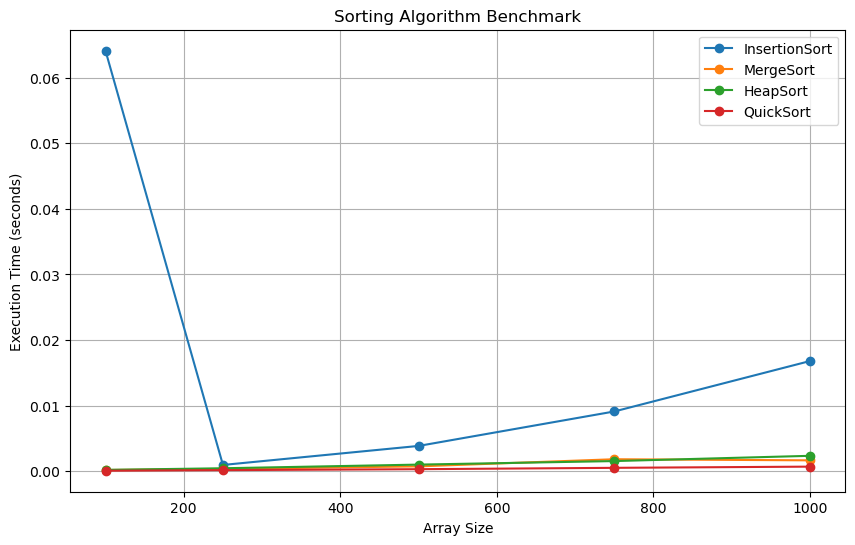

In [52]:
plt.figure(figsize=(10,6))
for algo, times in results.items():
    plt.plot(sizes, times, marker='o', label=algo)

plt.xlabel("Array Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Sorting Algorithm Benchmark")
plt.legend()
plt.grid(True)
plt.show()

### Task 3 


## Small-o proof: o(g(n))

## Intuition: strictly upper bound

We have:

$f(n) = o(g(n)) \iff f(n) = o(g(n))$,  

$f(n) = o(g(n)) \iff \forall c > 0, \, \exists n_0 \ge 1 \text{ such that } f(n) < c \cdot g(n) \text{ for all } n \ge n_0$,  

$\iff \lim_{n \to \infty} \frac{g(n)}{f(n)} = \infty$,  

$\iff \lim_{n \to \infty} \frac{f(n)}{g(n)} = 0$.


We want to show that $\frac{n^2}{\log n} = o(n^2)$ as $n \to \infty$.  

By definition of little-o, $f(n) = o(g(n))$ means $\lim_{n \to \infty} \frac{f(n)}{g(n)} = 0$.  

Here, $f(n) = \frac{n^2}{\log n}$ and $g(n) = n^2$, so:

$\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{\frac{n^2}{\log n}}{n^2} = \lim_{n \to \infty} \frac{1}{\log n} = 0.$  

This proves that $\frac{n^2}{\log n} = o(n^2)$.  


### Task 3b

We want to check if $n^2 = o(n^2)$.  

Here, let $f(n) = n^2$ and $g(n) = n^2$. Then:

$$
\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{n^2}{n^2} = \lim_{n \to \infty} 1 = 1 \neq 0
$$

Since the limit is **not 0**, we conclude that:

$$
n^2 \neq o(n^2)
$$
